<a href="https://colab.research.google.com/github/Uzair-DeVops/Quater-2/blob/main/langchain_project_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [2]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.8 MB/s eta 0:00:00


In [30]:
!pip install openai langchain


In [31]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
import openai
from langchain.prompts import PromptTemplate

In [21]:
first_prompt = PromptTemplate (
    input_variables = ["question"],
    template = "change this {question} into  a good image generative promt  ?"
)

Second_promt = PromptTemplate (
    input_variables = ["first_response"],
    template = "read this {first_response}   and summarize into two lines promt for image generation ?"
)




In [22]:
llm =  ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 75,
)

In [23]:
first_chain = first_prompt | llm
second_chain = Second_promt | llm



In [24]:

from diffusers import StableDiffusionPipeline
import torch

In [25]:
first_response = first_chain.invoke({"question" : input("write a image generation prompt ")})
print("First chain   " , first_response.content)


Second_response = second_chain.invoke({"first_response" : first_response.content})
print("Second chain   " , Second_response.content)


# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]

# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

write a image generation prompt image of car
First chain    Please provide the image of the car. I need to see the image to generate a good image generation prompt.  Once you provide the image, I will craft a prompt that captures its key features, including:

* **Make and Model (if identifiable):**  e.g., "a classic 1967 Ford Mustang"
* **Color:** e
Second chain    I can't provide images. I am a text-based AI and do not have the capability to access or display images.  Please provide the image yourself, and I will then help you create a two-line prompt for image generation.


Generating the image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


<class 'langchain_core.messages.ai.AIMessage'>


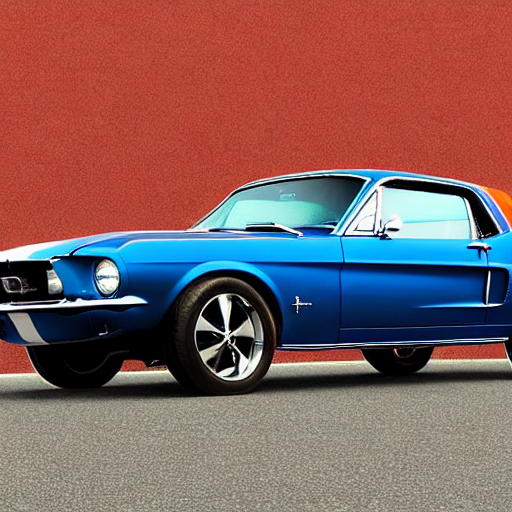

In [27]:
print(type(first_response))
image